In [5]:
import pandas as pd
import numpy as np
import alpaca
from alpaca_trade_api import REST
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
import pytz

### get stock data
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import StockHistoricalDataClient

### sentence embedding
from sentence_transformers import SentenceTransformer


from sklearn.metrics import r2_score, precision_score, recall_score, roc_auc_score, f1_score
from scipy.stats import spearmanr

In [6]:
import sys
sys.path = sys.path + ['../']

In [7]:
import my_secrets
import pickle

from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
stock_list = set(['AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOG', 
 'GOOGL', 'META', 'AVGO', 'PEP', 'COST', 'CSCO', 'TMUS', 'TXN', 
 'ADBE', 'CMCSA', 'AMD', 'NFLX', 'QCOM', 'HON', 'AMGN', 'INTC', 'INTU', 
 'SBUX', 'AMAT', 'GILD', 'BKNG', 'ADI', 'MDLZ', 'ADP', 'PYPL', 'ISRG', 
 'REGN', 'VRTX', 'FISV', 'LRCX', 'ATVI', 'CSX', 'MELI', 'MU', 'MRNA', 'SNPS', 
 'CDNS', 'PANW', 'ASML', 'KLAC', 'MNST', 'CHTR', 'MAR', 'ORLY', 'KDP', 'FTNT', 'KHC', 
 'AEP', 'ABNB', 'NXPI', 'MCHP', 'CTAS', 'DXCM', 'PDD', 'ADSK', 'EXC', 'AZN', 'IDXX', 'PAYX', 'PCAR', 
 'BIIB', 'SGEN', 'WDAY', 'ODFL', 'LULU', 'ROST', 'GFS', 'XEL', 'ILMN', 'WBD', 'CPRT', 'MRVL', 'DLTR', 
 'EA', 'CTSH', 'FAST', 'ENPH', 'WBA', 'BKR', 'VRSK', 'CRWD', 'CSGP', 'ANSS', 'CEG', 'ALGN', 'TEAM', 
 'FANG', 'EBAY', 'JD', 'DDOG', 'ZM', 'ZS', 'SIRI', 'LCID', 'RIVN']) |set(['TWTR','SNAP','ZM']) | set(['MSFT','TSLA','META','GOOGL','NVDA','AAPL','AMZN','NFLX','COIN','NIO',
              'AMD','ROKU','SPCE','PLTR','GME','BB','AMC','PLUG',
              'MRNA', 'ABNB', 'JPM', 'PFE', 'WMT', 'SQ',]) | set(['TQQQ'])
 
stock_list =list(stock_list)

In [12]:
date_start = datetime.datetime.strptime('2021-01-01-00:00:00','%Y-%m-%d-%H:%M:%S')
date_end = datetime.datetime.strptime('2023-04-02-00:00:00','%Y-%m-%d-%H:%M:%S')

In [15]:
for stock_code in tqdm(stock_list):
    import os
    if os.path.exists(f'./historical_price_data/{stock_code}.csv'):
        continue
    request_params = StockBarsRequest(
        symbol_or_symbols=stock_code,
        timeframe=TimeFrame.Minute,
        start=date_start,
        end=date_end, 
        adjustment='all'
    )

    client = StockHistoricalDataClient(api_key=my_secrets.API_KEY, secret_key=my_secrets.SECRET_KEY) ### request stock price
    bars = client.get_stock_bars(request_params)
    bas_df = bars.df.droplevel(axis=0,level=0)
    bas_df.index = [i.replace(tzinfo=None).tz_localize(pytz.timezone('UTC')).tz_convert('US/Eastern') for i in bas_df.index]
    bas_df.to_csv(f'./historical_price_data/{stock_code}.csv',index=True)



100%|██████████| 117/117 [2:28:04<00:00, 75.94s/it]  


In [16]:
stock_code = stock_list[0]

In [15]:
# request_params = StockBarsRequest(
#     symbol_or_symbols=stock_code,
#     timeframe=TimeFrame.Minute,
#     start=model.training_date_start,
#     end=model.training_date_end, 
#     adjustment='all'
# )

# client = StockHistoricalDataClient(api_key=my_secrets.API_KEY, secret_key=my_secrets.SECRET_KEY) ### request stock price
# bars = client.get_stock_bars(request_params)
# bas_df = bars.df.droplevel(axis=0,level=0)
# bas_df.index = [i.astimezone(pytz.UTC).replace(tzinfo=None) for i in bas_df.index]

# bas_df_15m = bas_df.resample(f'{model.time_interval}min',origin='epoch').ffill()

[i.replace(tzinfo=None).tz_localize(pytz.timezone('UTC')).tz_convert('US/Eastern') for i in bas_df.index]

[Timestamp('2022-01-03 06:05:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 08:13:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:30:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:31:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:32:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:34:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:35:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:37:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:38:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:39:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:40:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:41:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:43:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:44:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:45:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:47:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:48:00-0500', tz='US/Eastern'),
 Timestamp('2022-01-03 09:49:00

In [13]:
import shap

ModuleNotFoundError: No module named 'numba'

In [16]:
pip install numba

^C
ERROR: Operation cancelled by user

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install shap==0.39

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 1.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for shap: filename=shap-0.39.0-cp39-cp39-macosx_11_0_arm64.whl size=410890 sha256=b194ccbf73bae82e60705b092c8a8b95997e7e59c9a0ee89a9f24c04b7403a8a
  Stored in directory: /Users/chenyangkang/Library/Caches/pip/wheels/bb/91/16/f6a057925f93af7e4281f6afce3495b595b473342766eb451c
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.3
    Uninstalling shap-0.3:
      Successfully uninstalled shap-0.3

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
def quantile_loss(y_true, y_pred, alpha, delta, threshold, var):
    """
    loss function:
    x is the error between y_true and y_pred
    if 0<x<alpha: grad1 = -x, hess1 = 1; grad2 = grad1, hess2 = hess1
    elif x >= max(alpha, threshold): grad1 = 0, hess1 = 0; grad2 = (2 * np.random.randint(2, size=len(y_true)) - 1.0) * var, hess2 = 1
    :param y_true:
    :param y_pred:
    :param alpha:  quantile
    :param delta:
    :param threshold:
    :param var:  i think this is variance
    :return: grad: i think that this is negtive gradient
    """
    x = y_true - y_pred
    grad = (x < (alpha - 1.0) * delta) * (1.0 - alpha) - (
            (x >= (alpha - 1.0) * delta) & (x < alpha * delta)) * x / delta - alpha * (x > alpha * delta)
    hess = ((x >= (alpha - 1.0) * delta) & (x < alpha * delta)) / delta

    grad = (np.abs(x) < threshold) * grad - (np.abs(x) >= threshold) * (
            2 * np.random.randint(2, size=len(y_true)) - 1.0) * var
    hess = (np.abs(x) < threshold) * hess + (np.abs(x) >= threshold)
    return grad, hess  # grad一阶导 hess二阶导， sklearn的loss function格式


In [61]:
from functools import partial
class XGBQuantile(XGBRegressor):
  def __init__(self,quant_alpha=0.95,quant_delta = 1.0,quant_thres=1.0,quant_var =1.0,base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, subsample=1):
    self.quant_alpha = quant_alpha
    self.quant_delta = quant_delta
    self.quant_thres = quant_thres
    self.quant_var = quant_var
    self.nthread = 1
    self.seed = 42
    self.silent = True
    
    super().__init__(base_score=base_score, booster=booster, colsample_bylevel=colsample_bylevel,
       colsample_bytree=colsample_bytree, gamma=gamma, learning_rate=learning_rate, max_delta_step=max_delta_step,
       max_depth=max_depth, min_child_weight=min_child_weight, missing=missing, n_estimators=n_estimators,
       n_jobs= n_jobs, nthread=nthread, objective=objective, random_state=random_state,
       reg_alpha=reg_alpha, reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, seed=seed,
       silent=silent, subsample=subsample)
    
    self.test = None
  
  def fit(self, X, y):
    super().set_params(objective=partial(XGBQuantile.quantile_loss,alpha = self.quant_alpha,delta = self.quant_delta,threshold = self.quant_thres,var = self.quant_var) )
    super().fit(X,y)
    return self
  
  def predict(self,X):
    return super().predict(X)
  
  def score(self, X, y):
    y_pred = super().predict(X)
    score = XGBQuantile.quantile_score(y, y_pred, self.quant_alpha)
    score = 1./score
    return score
      
  @staticmethod
  def quantile_loss(y_true,y_pred,alpha,delta,threshold,var):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-  ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
 
    grad = (np.abs(x)<threshold )*grad - (np.abs(x)>=threshold )*(2*np.random.randint(2, size=len(y_true)) -1.0)*var
    hess = (np.abs(x)<threshold )*hess + (np.abs(x)>=threshold )
    return grad, hess
  
  @staticmethod
  def original_quantile_loss(y_true,y_pred,alpha,delta):
    x = y_true - y_pred
    grad = (x<(alpha-1.0)*delta)*(1.0-alpha)-((x>=(alpha-1.0)*delta)& (x<alpha*delta) )*x/delta-alpha*(x>alpha*delta)
    hess = ((x>=(alpha-1.0)*delta)& (x<alpha*delta) )/delta 
    return grad,hess

  
  @staticmethod
  def quantile_score(y_true, y_pred, alpha):
    score = XGBQuantile.quantile_cost(x=y_true-y_pred,alpha=alpha)
    score = np.sum(score)
    return score
  
  @staticmethod
  def quantile_cost(x, alpha):
    return (alpha-1.0)*x*(x<0)+alpha*x*(x>=0)
  
  @staticmethod
  def get_split_gain(gradient,hessian,l=1):
    split_gain = list()
    for i in range(gradient.shape[0]):
      split_gain.append(np.sum(gradient[:i])/(np.sum(hessian[:i])+l)+np.sum(gradient[i:])/(np.sum(hessian[i:])+l)-np.sum(gradient)/(np.sum(hessian)+l) )
    
    return np.array(split_gain)

In [89]:
1./10

0.1

[21:20:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "quant_alpha", "quant_delta", "quant_thres", "quant_var", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




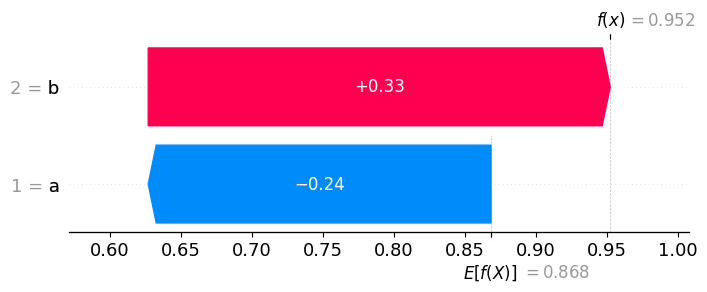

In [92]:
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
import shap

# train an XGBoost model
X = pd.DataFrame({
    'a':[1,2,3,4,3,6,1,34,3,6,1,3],
    'b':[2,2,51,2,5,2,14,2,3,4,3,2]
})
y = pd.DataFrame({
    'c':[1,3,5,1,1,5,3,1,5,31,6,7]
})

model = XGBQuantile(quant_alpha=0.9,random_state=0).fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(model,X)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [54]:
partial

NameError: name 'partial' is not defined

In [39]:
shap_values

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor
import shap

# train an XGBoost model
X = pd.DataFrame({
    'a':[1,2,3,4],
    'b':[2,2,51,2]
})
y = pd.DataFrame({
    'c':[1,3,5,7]
})
model = HistGradientBoostingRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)

explainer = shap.TreeExplainer(model) # change explainer as needed
shap_values = explainer(X)

# workaround...
from types import SimpleNamespace
to_pass = SimpleNamespace(**{
                          'values': np.array(shap_values[0].values),
                          'data': np.array(shap_values[0].data),
                          'feature_names': X.columns,
                          'base_values': shap_values[0].base_values[0]
            })
shap.plots.waterfall(to_pass)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ValueError: Image size of -320396968x292 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 800x250 with 3 Axes>

In [33]:
shap_values[0]


.values =
array([0., 0.])

.base_values =
array([4.])

.data =
array([1, 2])

In [27]:
to_pass

namespace(values=array([0., 0.]),
          data=array([1, 2]),
          feature_names=Index(['a', 'b'], dtype='object'),
          base_values=4.0)